In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [2]:
length = 100
percent = 0.2

half_len = int(length/2)
dim = 2

mean1 = [7,7]     # class-1 
mean2 = [13,13]   # class-2 
cov = [[4, 0], [0, 4]]


x1 = np.random.multivariate_normal(mean1, cov, half_len)
x2 = np.random.multivariate_normal(mean2, cov, half_len)
y1 = np.ones(half_len)
y2 = np.zeros(half_len)

x = np.append(x1,x2, axis=0)
y = np.append(y1,y2, axis=0)


# Shuffle the data
perm = np.random.permutation(length)
x = x[perm]
y = y[perm]

# Divide into train and test 
x_train = x[0   :   int(length*(1-percent))]
y_train = y[0   :   int(length*(1-percent))]
x_test = x[int(length*percent)   :   ]
y_test = y[int(length*percent)   :   ]

len_train = x_train.shape[0]
len_test = x_test.shape[0]

x_train = x_train.T
x_test = x_test.T

y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

print(x_train.shape)
print(y_train.shape)

(2, 80)
(1, 80)


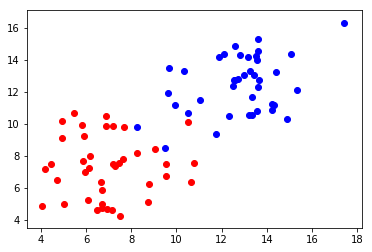

In [3]:
for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')

In [4]:
class LogisticRegression : 
    def __init__(self, x ,y, lr=0.001, reg=0.001):
        self.x = x
        self.y = y
        self.lr = lr
        self.reg = reg
        self.dim = self.x.shape[0]
        self.length = self.x.shape[1]
        self.w = np.random.random((dim, 1))
        self.b = 5
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
        
    def forward(self, x):
        return np.dot(self.w.T, x) + self.b
    
    def forward_prob(self, x):
        return self.sigmoid( self.forward(x) )
    
    def weight_derivative(self):
        ycap = self.forward_prob(self.x)
        return -(1/self.length) * np.dot( self.x, (self.y-ycap).T ) + self.reg * self.w
    
    def bias_derivative(self): 
        ycap = self.forward_prob(self.x)
        return (1/self.length)*np.sum( ycap - self.y )
    
    def update(self):
        del_W = self.weight_derivative()
        del_b = self.bias_derivative()
        self.w = self.w - self.lr * del_W
        self.b = self.b - self.lr * del_b
    
    def cost(self, y, yhat):
        # Cross Entropy Loss
        J = (1/self.length) * (-self.y*np.log(yhat) - (1-self.y)*np.log(1-yhat)) + self.reg * np.sum(self.w * self.w)
        return np.sum(J)

train:  3.521340458066833 test:  3.3586282698016827
train:  3.4404347837996268 test:  3.2905175579464814
train:  3.3597002690953683 test:  3.222575091065627
train:  3.279142932424289 test:  3.1548066269690747
train:  3.1987696987071166 test:  3.0872188062328556
train:  3.1185885420488306 test:  3.0198192931163126
train:  3.0386086510776282 test:  2.9526169390344696
train:  2.9588406202604327 test:  2.885621971975257
train:  2.8792966709586207 test:  2.8188462156468286
train:  2.799990906375344 test:  2.752303342528201
train:  2.720939604902222 test:  2.6860091653506113
train:  2.6421615566579817 test:  2.619981971812975
train:  2.563678448164983 test:  2.554242907470735
train:  2.4855153000488595 test:  2.488816411644347
train:  2.4077009622554852 test:  2.423730710749375
train:  2.330268670402835 test:  2.3590183724894684
train:  2.2532566653176955 test:  2.294716922658857
train:  2.1767088752875843 test:  2.2308695235961222
train:  2.10067565676422 test:  2.167525709275118
train:  2.

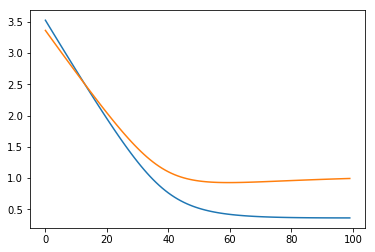

In [5]:
rate = 1e-3
reg = 1e-2
lr = LogisticRegression(x_train, y_train, rate, reg)

x1 = np.linspace(0,20)

cost_train = []
cost_test = []
for i in range(100):
    yhat_train = lr.forward_prob(x_train)
    c_train = lr.cost(y_train, yhat_train)
    yhat_test = lr.forward_prob(x_test)
    c_test = lr.cost(y_train, yhat_test)
    print('train: ', c_train, 'test: ', c_test)
    
    cost_train.append(c_train)
    cost_test.append(c_test)
    
    lr.update()

plt.plot(cost_train)
plt.plot(cost_test)

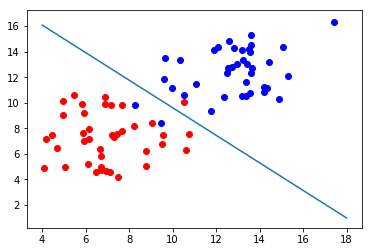

In [10]:
x1 = np.linspace(4,18)
x2 = (-1/lr.w[1,0]) * (lr.b + lr.w[0,0]*x1)

for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')
plt.plot(x1,x2)